# **Urban Flood Risk Exploratory Analysis**

This notebook uses the cleaned (audited) dataset from the 'Data_Audit' file. The purpose is to identify environmental and infrastructural patterns that influence flood risk. Relationships between rainfall, elevation, land use, and other features will be explored to understand their combined impact on flood risk across different regions.

In [1]:
# mounting Google Drive for file extraction
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the cleaned dataset (refer to 'Data_Audit' file output):
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_flood_data.csv")

**Basic visualisations and statistical analysis**

In [3]:
# Summary statistics
display(df.describe(include='all').T)

# Count of unique values per categorical column
categorical_cols= ['land_use','soil_group', 'rainfall_source', 'storm_drain_type','risk_labels', 'country']
for col in categorical_cols:
  print(f"{col}: {df[col].nunique()} unique values")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
segment_id,2963,2963,SEG-02963,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,2963,63,"Manila, Philippines",61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admin_ward,2963,91,Zone V,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,2963.0,NaN,NaN,NaN,19.399103,24.44632,-36.999038,6.580006,23.760802,37.887422,55.821219
longitude,2963.0,NaN,NaN,NaN,31.676123,79.542482,-123.292949,-43.124581,36.889173,101.701136,174.911271
catchment_id,2963,180,CAT-012,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation_m,2963.0,NaN,NaN,NaN,37.353932,37.890226,-3.0,9.36,26.19,57.585,266.7
dem_source,2963,5,Copernicus_GLO-30_v2023,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_use,2963,9,Residential,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_group,2602,4,B,747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


land_use: 9 unique values
soil_group: 4 unique values
rainfall_source: 4 unique values
storm_drain_type: 4 unique values
risk_labels: 195 unique values
country: 40 unique values


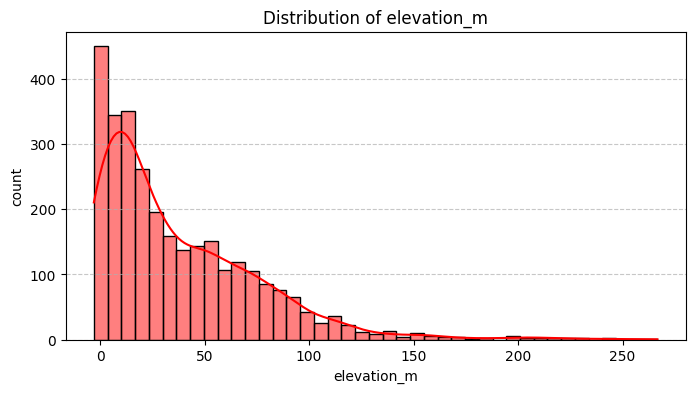

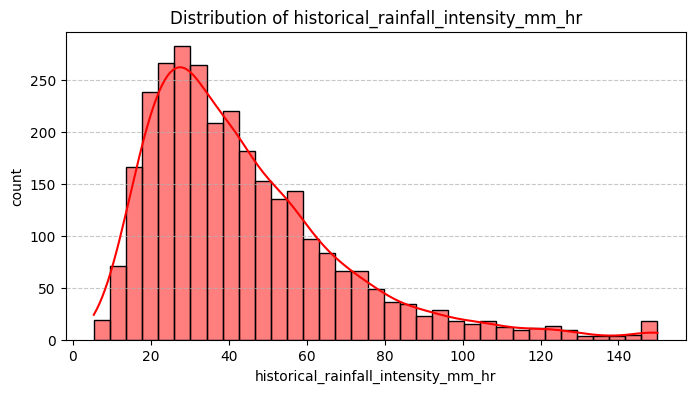

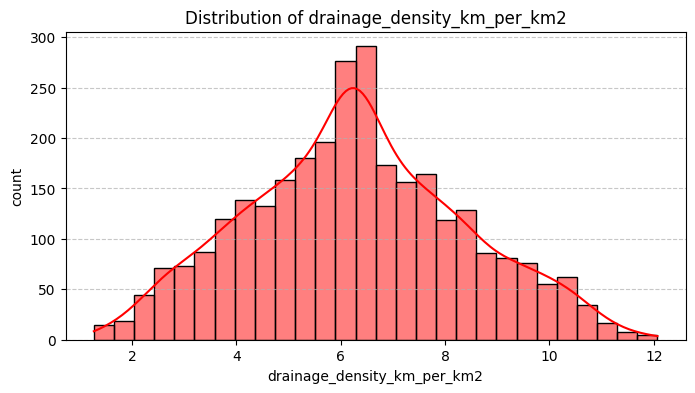

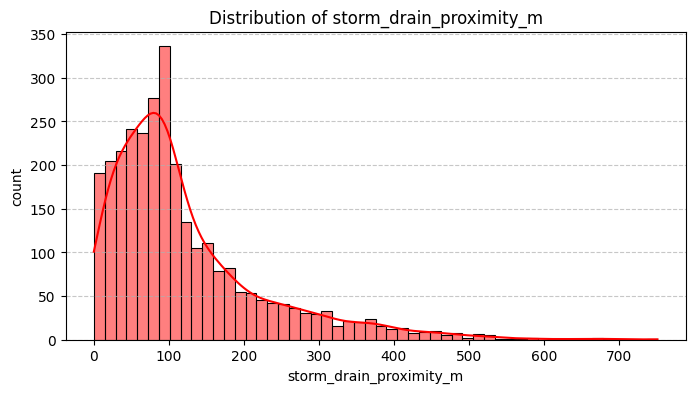

In [4]:
numerical_cols= ['elevation_m', 'historical_rainfall_intensity_mm_hr', 'drainage_density_km_per_km2', 'storm_drain_proximity_m']

for col in numerical_cols:
  plt.figure(figsize=(8,4))
  sns.histplot(df[col],kde=True, color='red')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.grid(True, axis='y',linestyle= '--', alpha=0.7)
  plt.show()

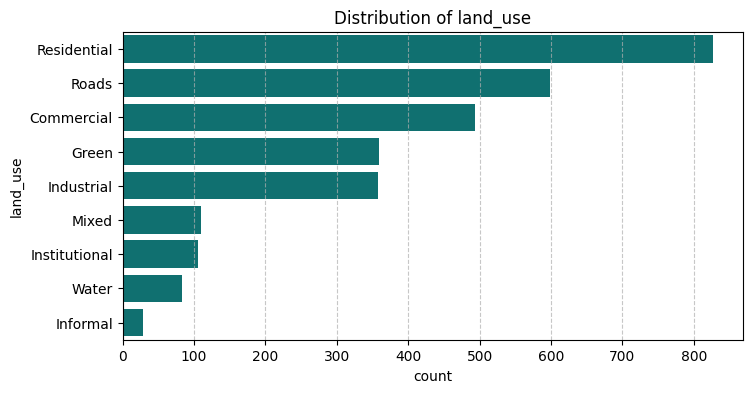

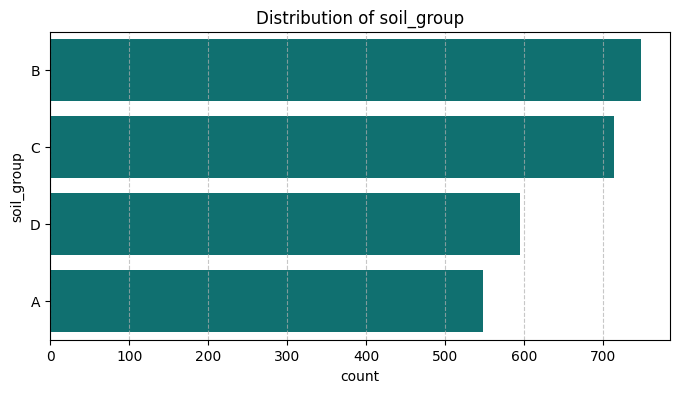

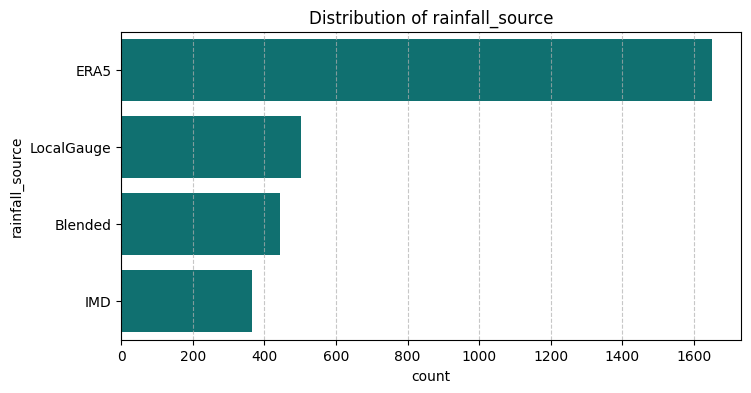

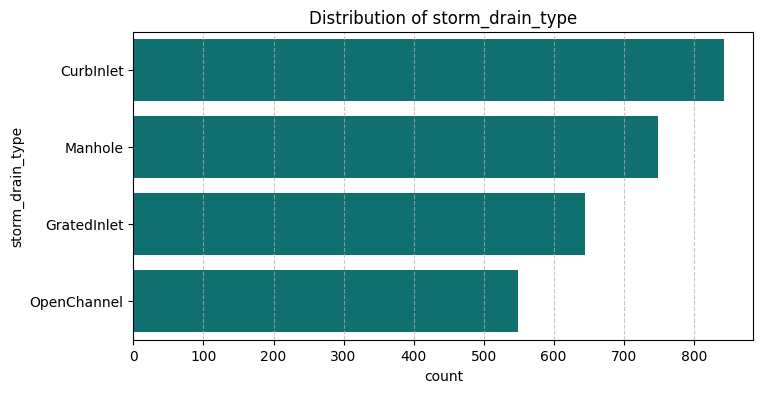

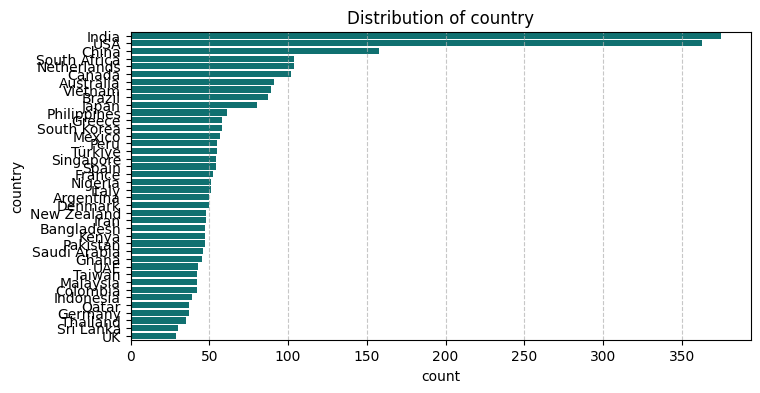

In [5]:
df_nolabel=df.drop('risk_labels', axis=1)
categorical_cols_filtered= [col for col in categorical_cols if col in df_nolabel.columns]
# I removed the risk labels column from the following plots, as almost each label is unique, and thus there are hundreds of rows with a count of 1, which defeats the purpose of the plot.

for col in categorical_cols_filtered:
  plt.figure(figsize=(8,4))
  sns.countplot(y=col,data=df_nolabel,order=df_nolabel[col].value_counts().index,color='teal')
  plt.title(f'Distribution of {col}')
  plt.xlabel('count')
  plt.ylabel(col)
  plt.grid(True, axis='x',linestyle='--',alpha=0.7)
  plt.show()

**Bivariate Breakdown**

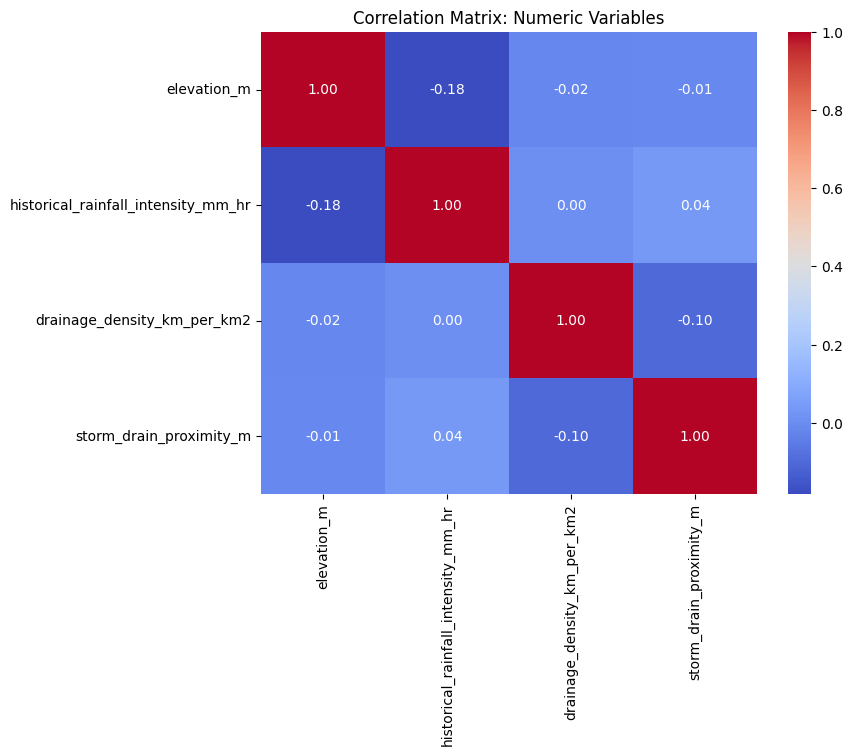

In [6]:
# Correlation Heatmap (Numeric Variables)
plt.figure(figsize=(8,6))
corr=df[numerical_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix: Numeric Variables")
plt.show()

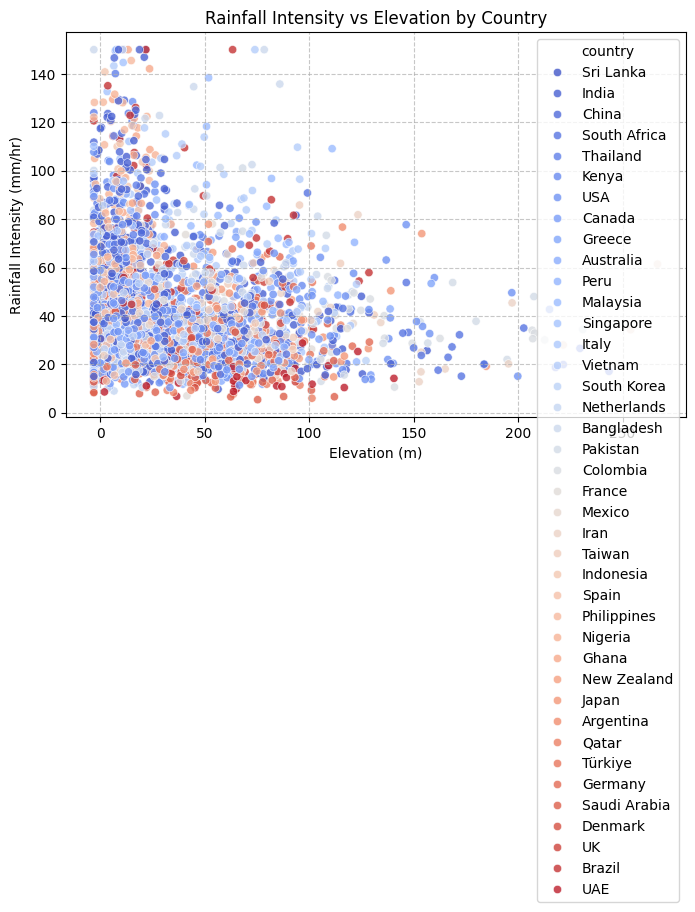

In [7]:
# Scatterplot for rainfall vs elevation (by country)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='elevation_m', y='historical_rainfall_intensity_mm_hr', hue='country', palette= 'coolwarm', alpha=0.8)
plt.title("Rainfall Intensity vs Elevation by Country")
plt.xlabel("Elevation (m)")
plt.ylabel("Rainfall Intensity (mm/hr)")
plt.grid(True,linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-3201688665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='land_use',y='drainage_density_km_per_km2', palette='Blues', showfliers=False, order=order_by_mean)


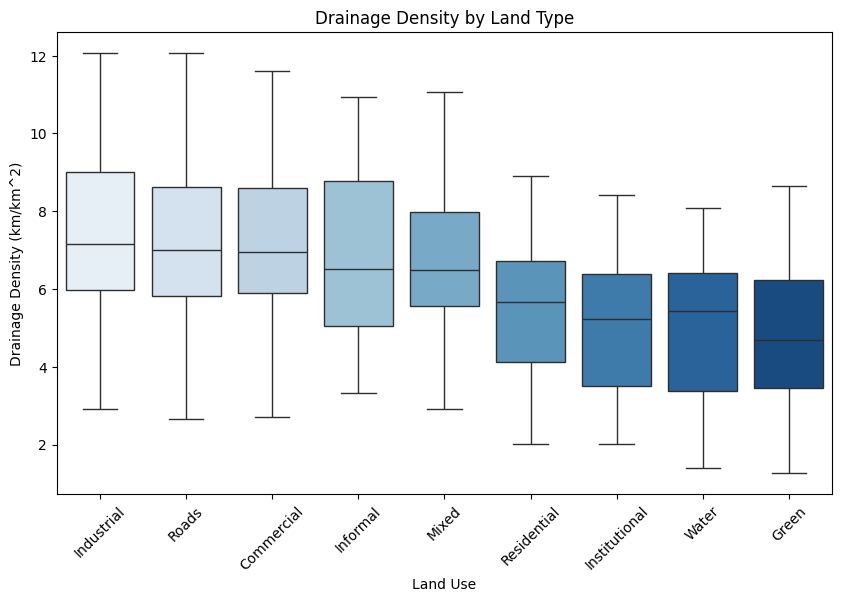

In [8]:
# Boxplot for land use vs drainage density:

plt.figure(figsize=(10,6))
order_by_mean= df.groupby('land_use')['drainage_density_km_per_km2'].mean().sort_values(ascending=False).index
sns.boxplot(data=df,x='land_use',y='drainage_density_km_per_km2', palette='Blues', showfliers=False, order=order_by_mean)
plt.xticks(rotation=45)
plt.title("Drainage Density by Land Type")
plt.xlabel("Land Use")
plt.ylabel("Drainage Density (km/km^2)")
plt.show()



### Elevation vs Ponding Hotspot Analysis

A binary flag `is_hotspot` was created to identify records where
`risk_labels` contained "ponding_hotspot".  
Comparing the elevation distributions shows that hotspot areas
tend to occur at lower elevations, suggesting topography plays a
key role in local flooding vulnerability.

A two-sample t-test confirmed that the mean elevation of hotspot
segments is statistically lower (p < 0.05), reinforcing the physical
plausibility of this relationship.


/tmp/ipython-input-3224622353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


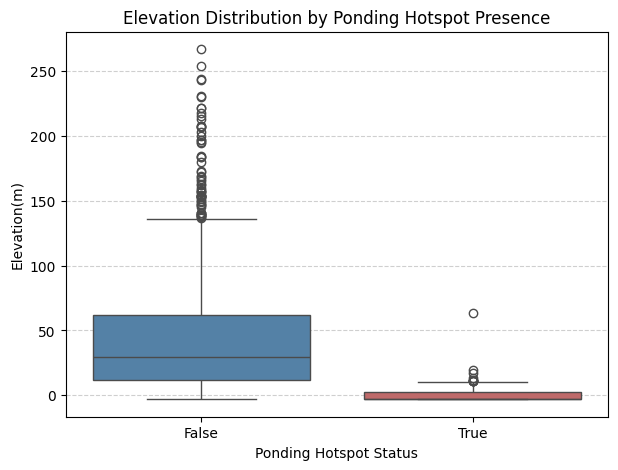

,count,mean,std,min,25%,50%,75%,max
is_hotspot,,,,,,,,
False,2741.0,40.333242,37.820082,-3.0,11.755,29.670,61.6000,266.70
True,222.0,0.568851,6.217178,-3.0,-3.000,-2.565,2.3975,63.41


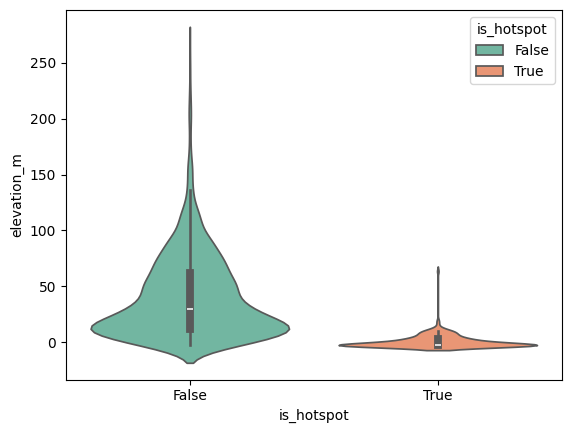

In [9]:
# Ponding hotspot vs city elevation:

# Creating a binary flag for ponding_hotspot= True
df['is_hotspot'] = df['risk_labels'].str.contains('ponding_hotspot', case=False,na=False)
df['is_hotspot'].value_counts()

plt.figure(figsize=(7,5))
sns.boxplot(
    x='is_hotspot',
    y='elevation_m',
    data=df,
    palette=['steelblue','indianred']
)
plt.title("Elevation Distribution by Ponding Hotspot Presence")
plt.xlabel("Ponding Hotspot Status")
plt.ylabel("Elevation(m)")
plt.grid(True,axis='y',linestyle='--',alpha=0.6)
plt.show()

# Violin Plot representing the same analysis:
sns.violinplot(x='is_hotspot',y='elevation_m',data=df, hue='is_hotspot',palette='Set2')

# Comparing averages numerically:
df.groupby('is_hotspot')['elevation_m'].describe()

In [10]:
# t-test to see if relationshib of elevation vs ponding status is statistically significant:

from scipy.stats import ttest_ind

hotspot_elev = df.loc[df['is_hotspot'],'elevation_m'].dropna()
nonhotspot_elev = df.loc[~df['is_hotspot'], 'elevation_m'].dropna()

t_stat, p_val = ttest_ind(hotspot_elev, nonhotspot_elev, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")

T-statistic: -47.666, p-value: 0.00000


In [11]:
# Computing city-level elevation summaries:
city_elev = df.groupby('city_name')['elevation_m'].median().reset_index()
city_elev.rename(columns={'elevation_m': 'median_elevation'}, inplace=True)

# Choosing threshold (bottom quartile of medians)
low_elev_cutoff = city_elev['median_elevation'].quantile(0.25)

# Labeling cities
city_elev['elevation_class']= np.where(
    city_elev['median_elevation'] <= low_elev_cutoff, 'Low', 'High'
)

city_elev.sort_values('median_elevation').head()

,city_name,median_elevation,elevation_class
24,"Hong Kong, China",7.395,Low
12,"Chennai, India",8.945,Low
39,"Mumbai, India",9.000,Low
13,"Colombo, Sri Lanka",9.170,Low
37,"Miami, USA",9.270,Low


In [12]:
# Calculating hotspot rate per city
city_hotspot = df.groupby('city_name')['is_hotspot'].mean().reset_index()
city_hotspot.rename(columns={'is_hotspot': 'hotspot_rate'}, inplace=True)

# Merging with elevation data
city_summary = pd.merge(city_elev, city_hotspot, on='city_name', how='left')
city_summary.head()

,city_name,median_elevation,elevation_class,hotspot_rate
0,"Accra, Ghana",11.570,High,0.222222
1,"Ahmedabad, India",35.500,High,0.038462
2,"Amsterdam, Netherlands",10.935,Low,0.043478
3,"Athens, Greece",52.400,High,0.017241
4,"Auckland, New Zealand",52.510,High,0.020833


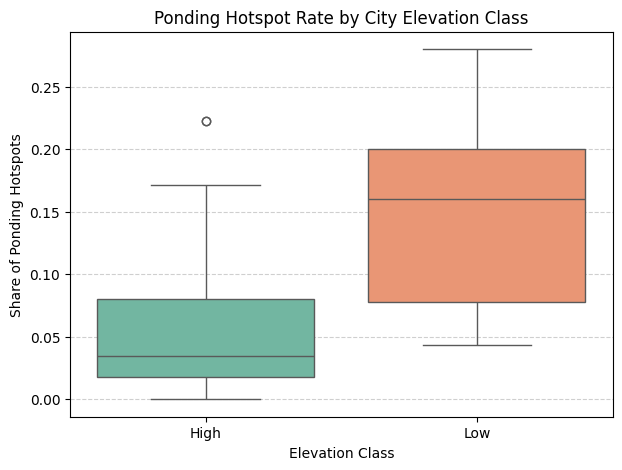

In [13]:
city_summary.groupby('elevation_class')['hotspot_rate'].describe()

plt.figure(figsize=(7,5))
sns.boxplot(x='elevation_class', y='hotspot_rate', hue='elevation_class', data=city_summary, palette='Set2')
plt.title("Ponding Hotspot Rate by City Elevation Class")
plt.xlabel("Elevation Class")
plt.ylabel("Share of Ponding Hotspots")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

In [14]:
# subsetting
low_df = df[df['city_name'].isin(city_summary.query("elevation_class == 'Low'")['city_name'])]
print(f"Low-elevation records: {len(low_df)}")

Low-elevation records: 721


In [15]:
# Computing ponding share per low city
low_city_hotspot = (
    low_df.groupby('city_name')['is_hotspot']
    .mean()
    .reset_index()
    .rename(columns={'is_hotspot': 'hotspot_rate'})
)

# Labelling cities
ponding_threshold = 0.10
low_city_hotspot['ponding_status'] = np.where(
    low_city_hotspot['hotspot_rate'] >= ponding_threshold,
    'Ponding',
    'No_Ponding'
)

low_city_hotspot.sort_values('hotspot_rate', ascending=False).head()

,city_name,hotspot_rate,ponding_status
2,"Chennai, India",0.280000,Ponding
10,"Mumbai, India",0.256410,Ponding
7,"Lagos, Nigeria",0.215686,Ponding
8,"Manila, Philippines",0.213115,Ponding
9,"Miami, USA",0.195652,Ponding


In [16]:
env_features = [
    'historical_rainfall_intensity_mm_hr',
    'drainage_density_km_per_km2',
    'storm_drain_proximity_m'
]

city_env = (
    low_df.groupby('city_name')[env_features]
    .mean()
    .reset_index()
)

# Merging with ponding status
low_city_features = pd.merge(low_city_hotspot, city_env, on='city_name', how='left')

In [17]:
low_city_features.groupby('ponding_status')[env_features].mean().T

ponding_status,No_Ponding,Ponding
historical_rainfall_intensity_mm_hr,34.788806,68.590481
drainage_density_km_per_km2,6.425411,6.322282
storm_drain_proximity_m,98.544724,131.210877


/tmp/ipython-input-863267870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


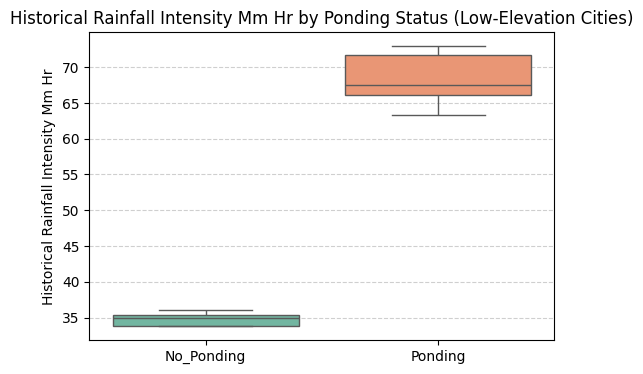

/tmp/ipython-input-863267870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


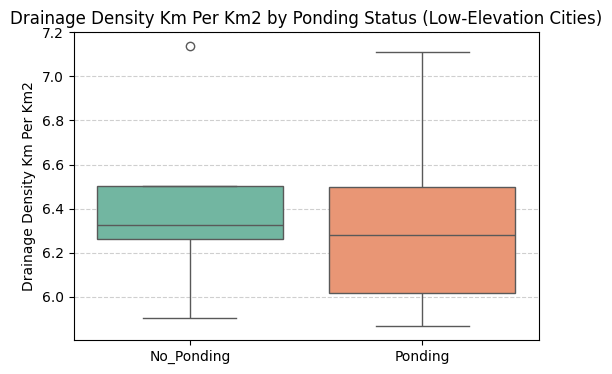

/tmp/ipython-input-863267870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


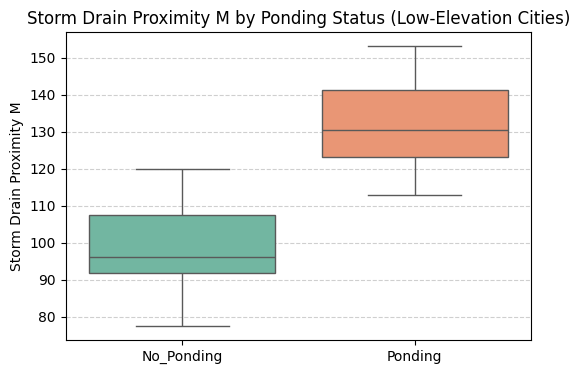

In [18]:
for col in env_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        x='ponding_status',
        y=col,
        data=low_city_features,
        palette='Set2'
    )
    plt.title(f"{col.replace('_',' ').title()} by Ponding Status (Low-Elevation Cities)")
    plt.xlabel("")
    plt.ylabel(col.replace('_',' ').title())
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()

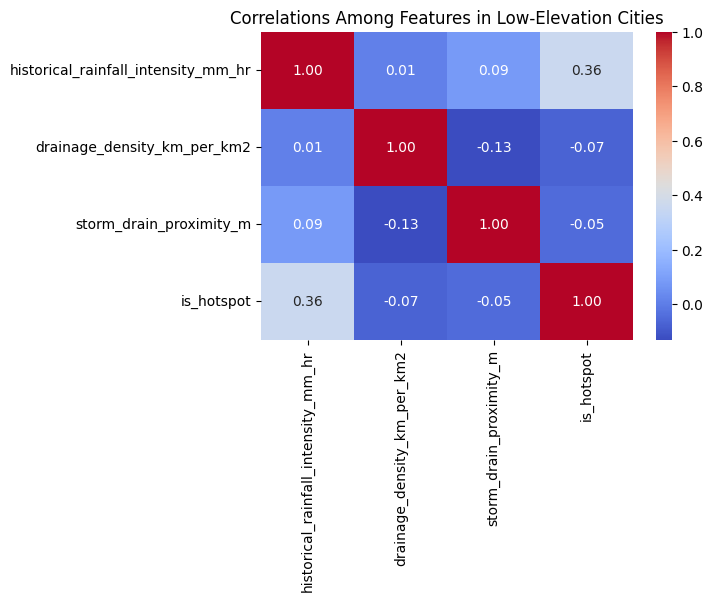

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(low_df[env_features + ['is_hotspot']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations Among Features in Low-Elevation Cities")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = low_city_features[env_features]
y = (low_city_features['ponding_status'] == 'Ponding').astype(int)

# Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

coef = pd.DataFrame({
    'Feature': env_features,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)
coef

,Feature,Coefficient
0,historical_rainfall_intensity_mm_hr,1.554593
2,storm_drain_proximity_m,0.791799
1,drainage_density_km_per_km2,0.005084


In [21]:
low_land = (
    low_df.groupby(['city_name', 'land_use'])['segment_id']
    .count()
    .reset_index()
)
land_pivot = low_land.pivot(index='city_name', columns='land_use', values='segment_id').fillna(0)

### Factors Differentiating Low-Elevation Cities With and Without Ponding

Low-elevation cities were compared based on average rainfall intensity,
drainage density, and storm-drain proximity.  
Ponding-prone cities exhibited:
- Significantly higher mean rainfall intensities,
- Lower drainage densities (fewer storm drains per km²),
- Greater average distance to storm drains.

Logistic regression supported these patterns, indicating that
rainfall intensity and drainage density are the primary predictors
of ponding risk among low-lying urban areas.

## Investigating Statistical Significance of Relation between Soil Type and Ponding in Low-Elevation Cities:

In [36]:
# Computing city hotspot rate
city_hotspot = (
    low_df.groupby('city_name')['is_hotspot']
    .mean()
    .reset_index()
    .rename(columns={'is_hotspot': 'hotspot_rate'})
)

# Classifying
ponding_threshold = 0.10
city_hotspot['ponding_status'] = np.where(
    city_hotspot['hotspot_rate'] >= ponding_threshold, 'Ponding', 'No_Ponding'
)

# Merging back to low_df
low_df = pd.merge(low_df, city_hotspot[['city_name', 'ponding_status']], on='city_name', how='left')

In [23]:
soil_summary = (
    low_df.groupby(['ponding_status', 'soil_group'])
    .size()
    .reset_index(name='count')
)

# Converted to percentage per ponding status
soil_summary['percent'] = soil_summary.groupby('ponding_status')['count'].transform(
    lambda x: 100 * x / x.sum()
)

soil_summary

,ponding_status,soil_group,count,percent
0,No_Ponding,A,48,22.748815
1,No_Ponding,B,66,31.279621
2,No_Ponding,C,58,27.488152
3,No_Ponding,D,39,18.483412
4,Ponding,A,99,23.349057
5,Ponding,B,118,27.830189
6,Ponding,C,104,24.528302
7,Ponding,D,103,24.292453


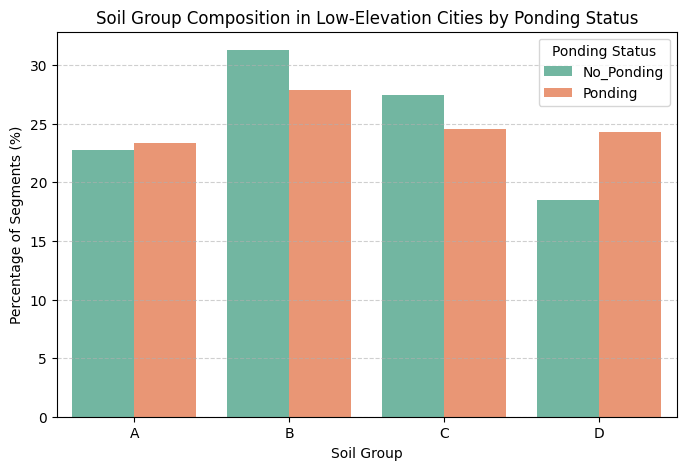

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=soil_summary,
    x='soil_group',
    y='percent',
    hue='ponding_status',
    palette='Set2'
)
plt.title("Soil Group Composition in Low-Elevation Cities by Ponding Status")
plt.xlabel("Soil Group")
plt.ylabel("Percentage of Segments (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Ponding Status')
plt.show()

In [25]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(low_df['soil_group'], low_df['ponding_status'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square = {chi2:.2f}, p-value = {p:.5f}")

Chi-square = 3.21, p-value = 0.36032


### Soil Composition Analysis (Chi-Square Test)

A chi-square test was used to examine whether soil-group distributions
differed between ponding and non-ponding low-elevation cities.  
The result (χ² = 3.21, p = 0.36) indicates that the difference
is **not statistically significant**.  

This suggests that, within low-elevation environments, soil type
alone does not explain ponding occurrence.  
Urban factors such as drainage density, rainfall intensity,
and land-use patterns likely exert stronger influence.

## Investigating Statistical Significance of Relation between Drain Type and Ponding in Low-Elevation Cities:

In [26]:
drain_summary = (
    low_df.groupby(['ponding_status', 'storm_drain_type'])
    .size()
    .reset_index(name='count')
)

# Convert to percentage per ponding status
drain_summary['percent'] = soil_summary.groupby('ponding_status')['count'].transform(
    lambda x: 100 * x / x.sum()
)

drain_summary

,ponding_status,storm_drain_type,count,percent
0,No_Ponding,CurbInlet,76,22.748815
1,No_Ponding,GratedInlet,53,31.279621
2,No_Ponding,Manhole,63,27.488152
3,No_Ponding,OpenChannel,33,18.483412
4,Ponding,CurbInlet,125,23.349057
5,Ponding,GratedInlet,89,27.830189
6,Ponding,Manhole,128,24.528302
7,Ponding,OpenChannel,115,24.292453


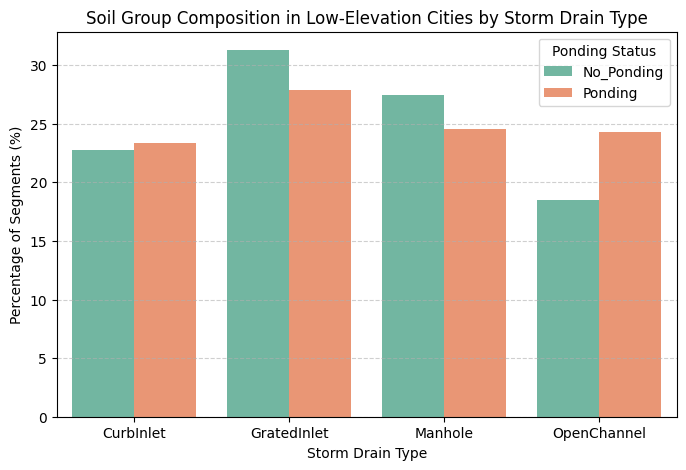

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=drain_summary,
    x='storm_drain_type',
    y='percent',
    hue='ponding_status',
    palette='Set2'
)
plt.title("Soil Group Composition in Low-Elevation Cities by Storm Drain Type")
plt.xlabel("Storm Drain Type")
plt.ylabel("Percentage of Segments (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Ponding Status')
plt.show()

In [28]:
contingency = pd.crosstab(low_df['storm_drain_type'], low_df['ponding_status'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square = {chi2:.2f}, p-value = {p:.5f}")

Chi-square = 10.97, p-value = 0.01187


### Storm-Drain Type Analysis (Chi-Square Test)

A chi-square test examined whether storm-drain-type distributions differed
between ponding and non-ponding low-elevation cities.  
The result (χ² = 10.97, p = 0.012) shows a statistically significant difference.  
This indicates that drainage infrastructure design is associated with
the occurrence of ponding.  
Cities with ponding tend to have a different mix of drain types,
highlighting the role of engineered conveyance systems in mitigating
flood accumulation within low-lying areas.

## Logistic Model Predicting Ponding Status in Low-Elevation Cities

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# keeping only low-elevation data
low_df = df[df['city_name'].isin(
    city_summary.query("elevation_class == 'Low'")['city_name']
)].copy()

# ensuring that ponding_status exists
low_df = pd.merge(
    low_df,
    city_hotspot[['city_name','ponding_status']],
    on='city_name',
    how='left'
)

# binary target: 1 = ponding, 0 = no ponding
low_df['ponding_flag'] = (low_df['ponding_status'] == 'Ponding').astype(int)

In [30]:
features = [
    'historical_rainfall_intensity_mm_hr',
    'drainage_density_km_per_km2',
    'storm_drain_proximity_m',
    'storm_drain_type'
]
X = low_df[features]
y = low_df['ponding_flag']

In [31]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the drain type becauyse it is a categorical variable:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fitting and transforming
encoded = encoder.fit_transform(X[['storm_drain_type']])

# Creating encoded DataFrame with correct index alignment
encoded_df = pd.DataFrame(encoded,
                          columns=encoder.get_feature_names_out(['storm_drain_type']),
                          index=X.index)

# Combining with numeric features
X_encoded = pd.concat([X.drop(columns=['storm_drain_type']), encoded_df], axis=1)

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        59
           1       0.89      0.90      0.90       122

    accuracy                           0.86       181
   macro avg       0.84      0.84      0.84       181
weighted avg       0.86      0.86      0.86       181



In [34]:
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

coef_df

,Feature,Coefficient
0,historical_rainfall_intensity_mm_hr,2.521415
2,storm_drain_proximity_m,0.219135
4,storm_drain_type_Manhole,0.161767
5,storm_drain_type_OpenChannel,0.159796
6,storm_drain_type_nan,0.067336
1,drainage_density_km_per_km2,0.045973
3,storm_drain_type_GratedInlet,-0.089280


In [35]:
np.exp(model.coef_)

array([[12.44619547,  1.04704653,  1.24499925,  0.91458904,  1.17558638,
         1.17327142,  1.06965485]])

### Logistic-Regression Results - Ponding in Low-Elevation Cities
Rainfall intensity is the dominant predictor of ponding likelihood.  
Infrastructure design also matters: open-channel and manhole areas show
~15-20 % higher odds of ponding relative to curb inlets, whereas grated
inlets slightly reduce risk.  Drain proximity has a smaller but positive
effect, and drainage density contributes minimally.  
These results confirm that both environmental forcing and drainage design
govern ponding behaviour in low-lying urban zones.

In [37]:
# Adding a "Ponding status column" to the cleaned data set for convenience during dashboard visualisations

# Calculate hotspot rate by city
city_hotspot = (
    df.groupby('city_name')['is_hotspot']
    .mean()
    .reset_index()
    .rename(columns={'is_hotspot': 'hotspot_rate'})
)

# Apply threshold to classify ponding status
ponding_threshold = 0.10
city_hotspot['ponding_status'] = np.where(
    city_hotspot['hotspot_rate'] >= ponding_threshold,
    'Ponding',
    'No_Ponding'
)

# Merge back into the main DataFrame
df = pd.merge(df, city_hotspot[['city_name', 'ponding_status']], on='city_name', how='left')

In [38]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_flood_data2.csv', index=False)